<a href="https://colab.research.google.com/github/yoshioakio/UAS-Artificial_Intelegence-Muhamad_Fajri_Permana_Haryanto-20220801439/blob/main/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tahap Penerapan Algoritma Machine Learning (Supervised) Klasifikasi Support Vector Machine (SVM)**

🔮 Pada Tahap ini, akan dilakukan 2 proses analisis dan penerapan algoritma machine learning supervised, yaitu dengan melakukan tahap pemrosesan mengunakan data hasil clustering dan tanpa data hasil clustering.

📌 Supervised Learning hasil clustering:
"Berdasarkan hasil clustering, apakah kita bisa memprediksi kategori film yang disukai pengguna berdasarkan faktor tertentu?"

📌 Supervised Learning tanpa hasil clustering: "Melakukan prediksi kategori film yang disukai pengguna berdasarkan faktor tertentu, tanpa menggunakan hasil klaster sebagai fitur tambahan? (klasifikasi tanpa data hasil clustering)"

# **1. Import Liblary**

🗃️liblary pyhton yang digunakana untuk pembangunan model algoritma machine learning (supervised) ini

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

🗃️ karena memakai data hasil dari tahap clustering data yang disimpan di google drive di tahap sebelumnnya, maka untuk itu diperlukan mengimport/memanggil data tersebut di google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
klas_df = pd.read_csv("/content/drive/MyDrive/dataset/ArtificialIntelegence/hasil_clus.csv")
klas_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_encoded,country_encoded,genre_encoded,duration_minutes,rating_genre,cluster,pca_x,pca_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,notknown,United States,"September 25, 2021",1.0,0.75,90 min,Documentary & Biography,"As her father nears the end of his life, filmm...",0.0,0.9,0.333333,0.017069,0.30,0,-0.254058,0.284791
1,s2,TV Show,Blood & Water,notknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Others,"September 24, 2021",1.0,0.50,2 Seasons,Drama,"After crossing paths at a party, a Cape Town t...",1.0,0.5,0.416667,0.117128,0.25,1,0.710224,-0.189155
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",notknown,"September 24, 2021",1.0,0.50,1 Season,Action & Adventure,To protect his family from a powerful drug lor...,1.0,1.0,0.000000,0.058270,0.00,1,0.740289,0.329634
3,s4,TV Show,Jailbirds New Orleans,notknown,notknown,notknown,"September 24, 2021",1.0,0.50,1 Season,Others,"Feuds, flirtations and toilet talk go down amo...",1.0,1.0,0.833333,0.058270,0.50,1,0.757879,0.286052
4,s5,TV Show,Kota Factory,notknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",1.0,0.50,2 Seasons,International,In a city of coaching centers known to train I...,1.0,0.2,0.666667,0.117128,0.40,1,0.690403,-0.500070


In [ ]:
print(f"Dataset memiliki {klas_df.shape[0]} baris dan {klas_df.shape[1]} kolom.\n")

Dataset memiliki 7810 baris dan 20 kolom.



In [ ]:
klas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           7810 non-null   object 
 1   type              7810 non-null   object 
 2   title             7810 non-null   object 
 3   director          7810 non-null   object 
 4   cast              7810 non-null   object 
 5   country           7810 non-null   object 
 6   date_added        7810 non-null   object 
 7   release_year      7810 non-null   float64
 8   rating            7810 non-null   float64
 9   duration          7810 non-null   object 
 10  listed_in         7810 non-null   object 
 11  description       7810 non-null   object 
 12  type_encoded      7810 non-null   float64
 13  country_encoded   7810 non-null   float64
 14  genre_encoded     7810 non-null   float64
 15  duration_minutes  7810 non-null   float64
 16  rating_genre      7810 non-null   float64


# **3. Menetukan Fitur Yang Cocok** (Pakai Hasil Clustering)

📌 Fitur utama yang relevan untuk di lakukan tahap supervised, berdasarkan hasil dari clustering :

* ✅ release_year
* ✅ duration_minutes
* ✅ rating_genre
* ✅ country_encoded
* ✅ genre_encoded
* ✅ rating
* ✅ cluster → Hasil dari proses clustering sebelumnnya

In [ ]:
def assign_popularity(row):
    if row['cluster'] == 1 and row['rating'] >= 0.50 and row['genre_encoded'] >= 0.49:
        return '0'
    elif row['cluster'] == 0 and row['rating'] >= 0.50 and row['genre_encoded'] >= 0.49:
        return '0'
    elif row['cluster'] == 1 and row['rating'] < 0.50 and row['genre_encoded'] < 0.49:
        return '1'
    elif row['cluster'] == 0 and row['rating'] < 0.50 and row['genre_encoded'] < 0.49:
        return '1'
    else:
        return '1'

klas_df['like'] = klas_df.apply(assign_popularity, axis=1)

In [ ]:
all_features = ['release_year', 'duration_minutes', 'country_encoded', 'rating_genre', 'cluster']

X = klas_df[all_features]
y = klas_df['like']

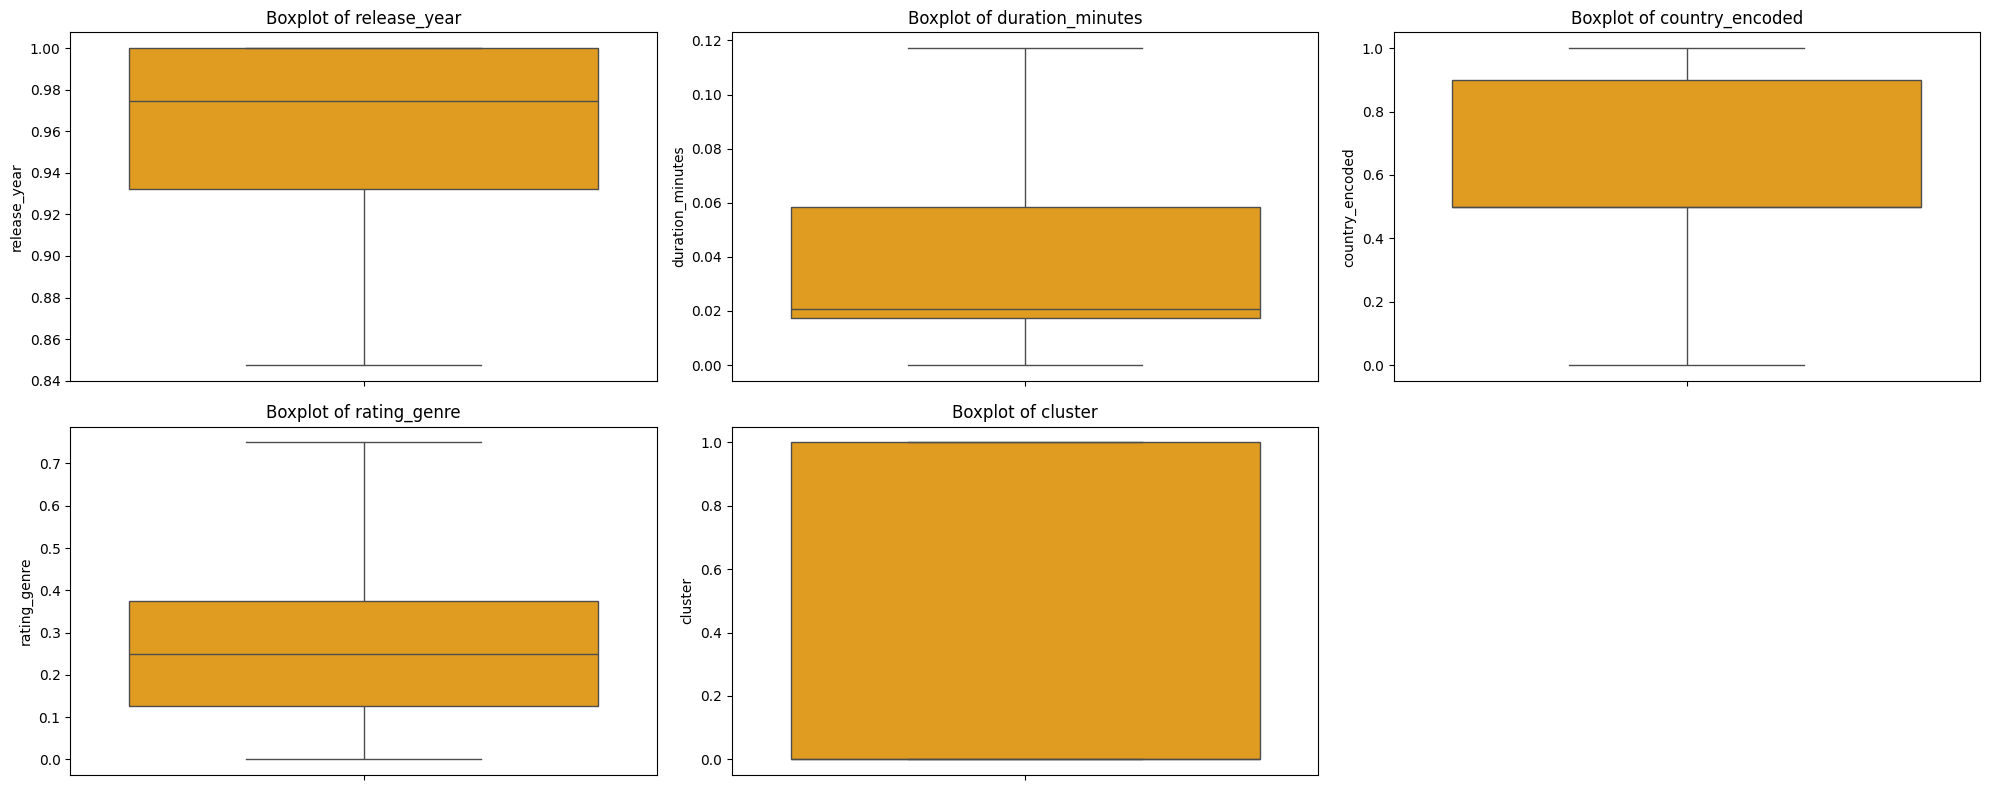

In [ ]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(all_features, 1):
    plt.subplot(2, (len(all_features) + 1) // 2, i)
    sns.boxplot(data=klas_df, y=column, color="orange")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# **4. Memisahkan Data**

➗ **Data kemudian dibagi menjadi 80% untuk data latih dan 20% untuk data prediksi.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_distribution = y_train.value_counts()
print("Distribusi Target pada Training Set:")
train_distribution

Distribusi Target pada Training Set:


,count
like,
1,4831
0,1417


In [ ]:
test_distribution = y_test.value_counts()
print("\nDistribusi Target pada Test Set:")
test_distribution


Distribusi Target pada Test Set:


,count
like,
1,1203
0,359


# **5. Membangun Model Klasifikasi**

## **1️⃣ Menggunakan Support Vector Machine**

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## **2️⃣ Latih model menggunakan data latih**

In [ ]:
y_train_pred_svm = svm_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred_svm)
print(f"Akurasi pada data latih menggunakan SVM: {accuracy_train:.4f}")

Akurasi pada data latih menggunakan SVM: 0.9067


In [ ]:
report_train = classification_report(y_train, y_train_pred_svm, digits=4)
print("Classification Report untuk Data Latih menggunakan SVM:")
print(report_train)

Classification Report untuk Data Latih menggunakan SVM:
              precision    recall  f1-score   support

           0     0.8510    0.7135    0.7762      1417
           1     0.9198    0.9634    0.9411      4831

    accuracy                         0.9067      6248
   macro avg     0.8854    0.8384    0.8586      6248
weighted avg     0.9042    0.9067    0.9037      6248



## **3️⃣ Latih model menggunakan data uji**

In [ ]:
y_test_pred_svm = svm_model.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Akurasi pada data uji menggunakan SVM: {accuracy_test_svm:.4f}")

Akurasi pada data uji menggunakan SVM: 0.8937


In [ ]:
report_test_svm = classification_report(y_test, y_test_pred_svm, digits=4)
print("Classification Report untuk Data Uji menggunakan SVM:")
print(report_test_svm)

Classification Report untuk Data Uji menggunakan SVM:
              precision    recall  f1-score   support

           0     0.8044    0.7103    0.7544       359
           1     0.9165    0.9485    0.9322      1203

    accuracy                         0.8937      1562
   macro avg     0.8604    0.8294    0.8433      1562
weighted avg     0.8907    0.8937    0.8913      1562



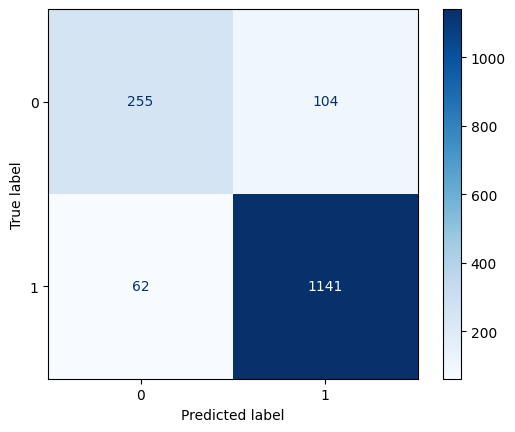

In [ ]:
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='Blues')
plt.show()

## **4️⃣ Mengecek Underfiting dan overfitting Model**

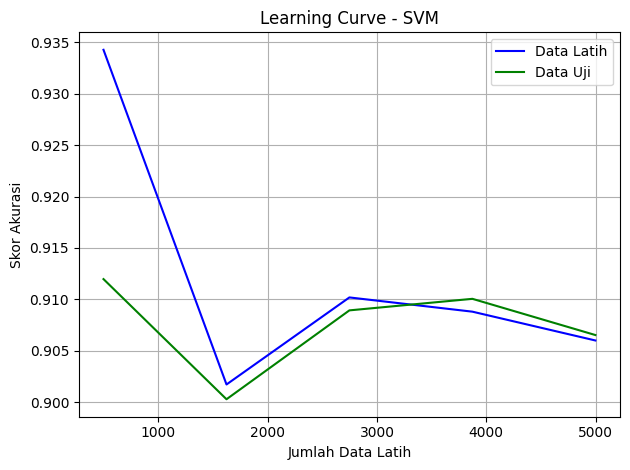

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Data Latih', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Data Uji', color='green')

plt.title('Learning Curve - SVM')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('Skor Akurasi')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## **5️⃣ Menampilkan Prediksi Kategori Film Teratas**

In [ ]:
svm_model.fit(X_train, y_train)
klas_df['like'] = svm_model.predict(X)
category_popularity = klas_df.groupby(['listed_in', 'like']).size().unstack(fill_value=0)
top_10_categories = category_popularity['0'].sort_values(ascending=False).head(10)

print("\nPrediksi 10 Kategori film yang disukai pelanggan kedepannya dengan SVM Berdasarkan Karakteristik:")
print(top_10_categories)


Prediksi 10 Kategori film yang disukai pelanggan kedepannya dengan SVM Berdasarkan Karakteristik:
listed_in
International         556
Others                450
Drama                 239
Horror & Thriller     179
Music & Dance          61
Family & Kids          12
Sci-Fi & Fantasy        6
Sports & Fitness        2
Action & Adventure      0
Anime & Animation       0
Name: 0, dtype: int64


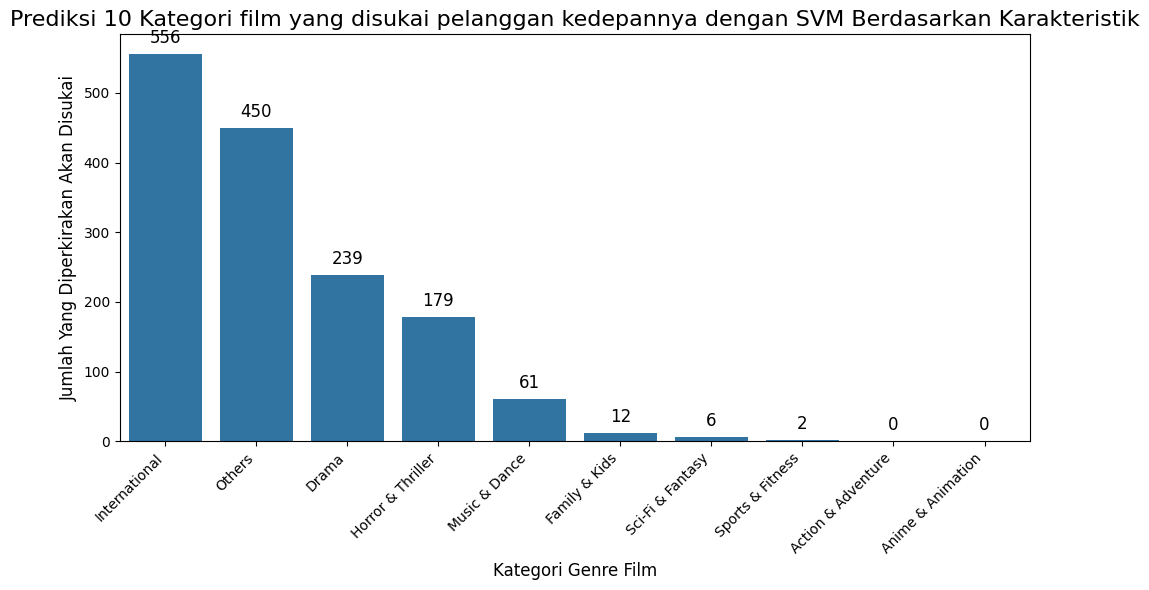

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)

for index, value in enumerate(top_10_categories.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Prediksi 10 Kategori film yang disukai pelanggan kedepannya dengan SVM Berdasarkan Karakteristik', fontsize=16)
plt.xlabel('Kategori Genre Film', fontsize=12)
plt.ylabel('Jumlah Yang Diperkirakan Akan Disukai', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **6. Pengoptimalan Hyperparameter Setelah Tuning Model**

## **1️⃣ Pemilihan Hyperparameter Yang Sesuai**

**RandomizedSearchCV** dipilih karena lebih efisien dibandingkan GridSearchCV, terutama untuk dataset besar atau parameter yang kompleks. Metode ini mencari kombinasi parameter secara acak, mengurangi waktu komputasi, dan tetap menemukan hyperparameter optimal.

## **2️⃣ Sebelum Dilakukan Penerapan RandomizedSearchCV**

In [ ]:
for y_true, y_pred, label in [(y_train, y_train_pred_svm, 'Latih SVM'), (y_test, y_test_pred_svm, 'Prediksi SVM')]:
    print(f"\n{label}:")
    print(f"Akurasi: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")


Latih SVM:
Akurasi: 0.9067
Precision: 0.9042
Recall: 0.9067
F1-Score: 0.9037

Prediksi SVM:
Akurasi: 0.8937
Precision: 0.8907
Recall: 0.8937
F1-Score: 0.8913


## **3️⃣ Pengoptimalan SVM Dengan RandomizedSearchCV**

In [ ]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

svm_model_tuned = SVC(random_state=42)
random_search_tuned = RandomizedSearchCV(svm_model_tuned, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='accuracy',
                                   random_state=42, n_jobs=-1)

random_search_tuned.fit(X_train, y_train)
print("Best Parameters:", random_search_tuned.best_params_)

Best Parameters: {'kernel': 'rbf', 'gamma': 1, 'degree': 3, 'C': 10}


## **4️⃣ Evaluasi SVM setelah penerapan RandomizedSearchCV**

In [ ]:
best_svm_tuned = random_search_tuned.best_estimator_
y_train_pred_svm_tuned = best_svm_tuned.predict(X_train)
y_test_pred_svm_tuned = best_svm_tuned.predict(X_test)

svm_accuracy_tuned = accuracy_score(y_test, y_test_pred_svm_tuned)
svm_f1_tuned = f1_score(y_test, y_test_pred_svm_tuned, average='weighted')
svm_precision_tuned = precision_score(y_test, y_test_pred_svm_tuned, average='weighted')
svm_recall_tuned = recall_score(y_test, y_test_pred_svm_tuned, average='weighted')

print(f"\nHasil SVM Tuned dengan RandomizedSearchCV")
print(f'SVM Tuned - Akurasi: {svm_accuracy_tuned:.4f}')
print(f'SVM Tuned - F1-Score: {svm_f1_tuned:.4f}')
print(f'SVM Tuned - Precision: {svm_precision_tuned:.4f}')
print(f'SVM Tuned - Recall: {svm_recall_tuned:.4f}')


Hasil SVM Tuned dengan RandomizedSearchCV
SVM Tuned - Akurasi: 0.9289
SVM Tuned - F1-Score: 0.9251
SVM Tuned - Precision: 0.9313
SVM Tuned - Recall: 0.9289


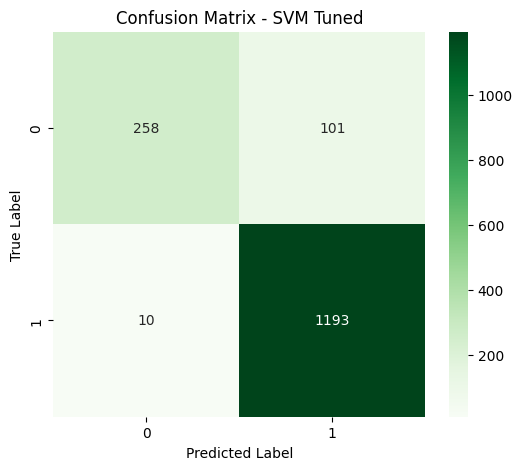

In [ ]:
cm_tuned = confusion_matrix(y_test, y_test_pred_svm_tuned)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Tuned')
plt.show()

Penerapan **RandomizedSearchCV berhasil** meningkatkan performa SVM secara signifikan. **Akurasi naik dari 89.37% menjadi 92.89%,** dengan peningkatan pada Precision, Recall, dan F1-Score. Hal ini menunjukkan bahwa optimasi hyperparameter dapat meningkatkan kemampuan model dalam mengenali pola data dengan lebih baik.

# **7. Membangun Model Klasifikasi Tanpa Hasil Clustering**

## **0️⃣ Menetukan Fitur (Tanpa Clustering)**

In [ ]:
def assign_popularity_no_cluster(row):
    if row['rating'] >= 0.50 and row['genre_encoded'] >= 0.49:
        return '0'
    else:
        return '1'

klas_df['like_no_cluster'] = klas_df.apply(assign_popularity_no_cluster, axis=1)


In [ ]:
all_features_no_cluster = ['release_year', 'duration_minutes', 'country_encoded', 'rating', 'genre_encoded']

X_no_cluster = klas_df[all_features_no_cluster]
y_no_cluster = klas_df['like_no_cluster']

## **1️⃣ Pisahkan Data Menjadi Train dan Test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train_no_cluster, X_test_no_cluster, y_train_no_cluster, y_test_no_cluster = train_test_split(
    X_no_cluster, y_no_cluster, test_size=0.2, random_state=42
)

In [ ]:
print("Distribusi Target pada Training Set Tanpa Clustering:")
print(y_train_no_cluster.value_counts())

Distribusi Target pada Training Set Tanpa Clustering:
like_no_cluster
1    4831
0    1417
Name: count, dtype: int64


In [ ]:
print("\nDistribusi Target pada Test Set Tanpa Clustering:")
print(y_test_no_cluster.value_counts())


Distribusi Target pada Test Set Tanpa Clustering:
like_no_cluster
1    1203
0     359
Name: count, dtype: int64


## **2️⃣ Latih Model SVM (Tanpa Clustering)**

In [ ]:
svm_model_no_cluster = SVC(kernel='linear', random_state=42)
svm_model_no_cluster.fit(X_train_no_cluster, y_train_no_cluster)

SVC(kernel='linear', random_state=42)

## **3️⃣ Evaluasi Model (Tanpa Clustering)**

In [ ]:
y_train_pred_svm_no_cluster = svm_model_no_cluster.predict(X_train_no_cluster)
y_test_pred_svm_no_cluster = svm_model_no_cluster.predict(X_test_no_cluster)

In [ ]:
for y_true, y_pred, label in [(y_train_no_cluster, y_train_pred_svm_no_cluster, 'Latih SVM Tanpa Clustering'),
                               (y_test_no_cluster, y_test_pred_svm_no_cluster, 'Prediksi SVM Tanpa Clustering')]:
    print(f"\n{label}:")
    print(f"Akurasi: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")


Latih SVM Tanpa Clustering:
Akurasi: 0.9294
Precision: 0.9281
Recall: 0.9294
F1-Score: 0.9281

Prediksi SVM Tanpa Clustering:
Akurasi: 0.9289
Precision: 0.9276
Recall: 0.9289
F1-Score: 0.9277


## **4️⃣ Confusion Matrix (Tanpa Clustering)**

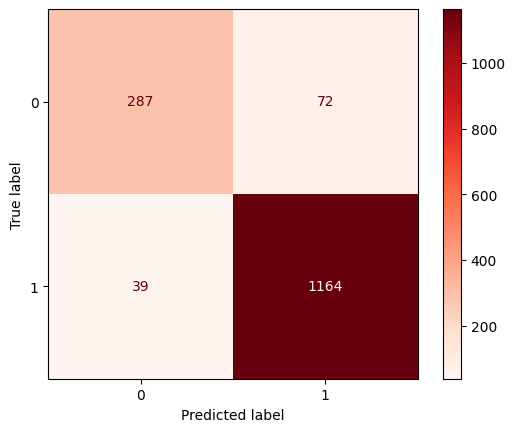

In [ ]:
conf_matrix_svm_no_cluster = confusion_matrix(y_test_no_cluster, y_test_pred_svm_no_cluster)
disp_svm_no_cluster = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm_no_cluster, display_labels=svm_model_no_cluster.classes_)
disp_svm_no_cluster.plot(cmap='Reds')
plt.show()

# **8. Evaluasi dan Perbandingan Evaluasi Model Klasifikasi**

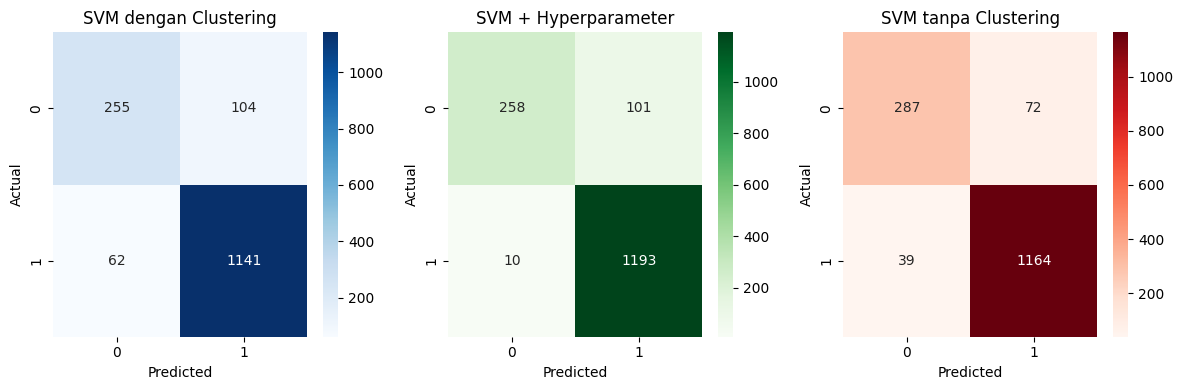

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[0])
axes[0].set_title("SVM dengan Clustering")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

conf_matrix_svm_tuned = confusion_matrix(y_test, y_test_pred_svm_tuned)
sns.heatmap(conf_matrix_svm_tuned, annot=True, fmt='d', cmap='Greens', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[1])
axes[1].set_title("SVM + Hyperparameter")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

conf_matrix_svm_no_cluster = confusion_matrix(y_test_no_cluster, y_test_pred_svm_no_cluster)
sns.heatmap(conf_matrix_svm_no_cluster, annot=True, fmt='d', cmap='Reds', xticklabels=set(y_test_no_cluster), yticklabels=set(y_test_no_cluster), ax=axes[2])
axes[2].set_title("SVM tanpa Clustering")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

## **🎞️Interpretasi hasil**

🫧 SVM dengan Clustering:
* Hasil clustering memberikan akurasi yang baik, namun masih ada 104 prediksi salah untuk kategori negatif dan 62 untuk kategori positif. Clustering membantu, tapi masih ada potensi peningkatan akurasi.

🛠️ SVM + Hyperparameter Tuning:
* Model ini menunjukkan hasil terbaik, dengan hanya 101 kesalahan pada kategori negatif dan 10 kesalahan pada kategori positif. Tuning hyperparameter berhasil meminimalkan kesalahan prediksi.

⛓️‍💥 SVM tanpa Clustering:
* Meskipun tanpa clustering, model ini tetap akurat, meski terdapat sedikit lebih banyak kesalahan dibandingkan dengan model dengan hyperparameter tuning. Akurasi tetap tinggi namun tidak seoptimal model dengan tuning.

## **🏆Kesimpulan**
Untuk prediksi kesukaan/favorit pelanggan, **model SVM dengan Tuning Hyperparameter memberikan hasil yang paling optimal**, dengan kesalahan lebih rendah dibandingkan model lain. **Penggunaan clustering juga memberikan nilai tambah,** namun tuning hyperparameter lebih efektif dalam meningkatkan akurasi prediksi. SVM tanpa clustering tetap dapat digunakan, namun akurasinya sedikit lebih rendah.